# Programming Task

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Load dataset

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width',
         'class']
dataset = pd.read_csv(url, names=names)

## Explore Dataset


Write code to check how many instances (rows) and how many attributes (columns) the data contains. 

In [3]:
dataset.shape

(150, 5)

Write code to take a peek at the data

In [4]:
dataset.head(20)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
dataset.tail(20)

,sepal-length,sepal-width,petal-length,petal-width,class
130,7.4,2.8,6.1,1.9,Iris-virginica
131,7.9,3.8,6.4,2.0,Iris-virginica
132,6.4,2.8,5.6,2.2,Iris-virginica
133,6.3,2.8,5.1,1.5,Iris-virginica
134,6.1,2.6,5.6,1.4,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica


Write code to obtain the count, mean, the min and max values as well as some percentiles.

In [6]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Write code to take a look at the number of instances (rows) that belong to each class.

In [7]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [8]:
dataset['class'].size

150

Write code to create univariate plots to better understand each attribute. [Hint: use functions dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False) and then pyplot.show() to show the plots]

## Data Visualization

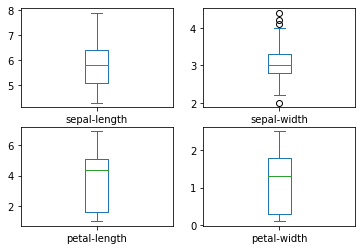

In [9]:
dataset.plot(kind='box', subplots=True, layout=(2,2),
             sharex=False, sharey=False)
pyplot.show()

Write code to create a histogram of each input variable to get an idea of the distribution. [Hint: use functions dataset.hist() and pyplot.show()]

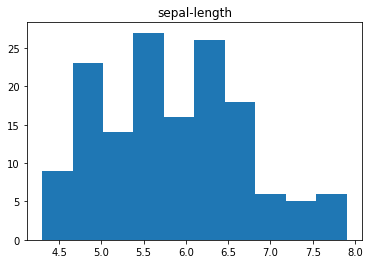

In [10]:
dataset.hist('sepal-length', grid=False)
pyplot.show()

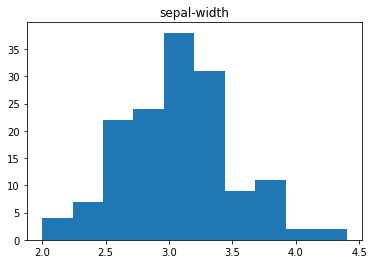

In [11]:
dataset.hist('sepal-width', grid=False)
pyplot.show()

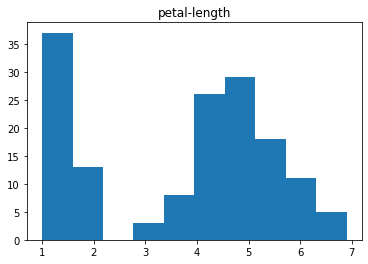

In [12]:
dataset.hist('petal-length', grid=False)
pyplot.show()

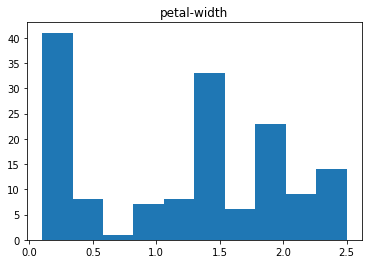

In [13]:
dataset.hist('petal-width', grid=False)
pyplot.show()

Generate multivariate plot to look at the interactions between the variables. [Hint: use functions scatter_matrix(dataset) and pyplot.show()]

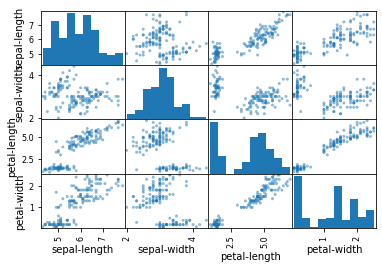

In [14]:
pd.plotting.scatter_matrix(dataset)
pyplot.show()

## Preparing dataset and performing ML training

Write code to randomly split the data into a training set (80%) and validation set (20%).

In [15]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)

Write code test 6 different algorithms simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. Use 10-fold cross-validation.

In [16]:
#Spot Check Algorithms
models=[]
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [17]:
#Evaluate each model in turn w/ a for loop
results=[]
names=[]
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results=cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


Which algorithm has the largest estimated accuracy?
    A: SVM, since it has the highest mean cross_val_score.

## Predictions using Test Set

Write code to use the algorithm with the largest estimated accuracy to make predictions on the validation dataset. [Hint: use functions model.fit(X_train, Y_train) and predictions = model.predict(X_validation)

In [18]:
model=SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
predictions

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

Write code to evaluate the predictions by obtaining the accuracy, confusion matrix, precision, recall and F1 Score

In [20]:
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

